# US Gun purchases per state based on census data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<a id='wrangling'></a>
## Data Wrangling

### General Properties
> **Gun data**: The gun dataset is our first dataset up for analysis. This dataset should provide us information regarding gun posession and purchase

In [11]:
#Load gun data
gun_df = pd.read_csv('gun_data.csv')
gun_df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,1378.0,1262.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,200.0,154.0,2.0,28.0,30.0,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,0.0,1474.0,748.0,3.0,82.0,5.0,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,0.0,1296.0,1824.0,4.0,0.0,0.0,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,535.0,397.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [12]:
#Determin the type of data in the dataset
gun_df.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [13]:
#Determin the number of rows and columns in the gun data
gun_df.shape

(12485, 27)

In [14]:
#View basic statistics from the gun data
gun_df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,10545.000000,10544.000000,5115.000000,2200.000000,2145.000000,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,407.970413,599.332417,1.815249,29.612727,7.557576,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,783.467053,952.144809,4.574641,81.943020,22.097046,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,39.000000,175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,561.000000,872.000000,2.000000,16.000000,4.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,10046.000000,8831.000000,79.000000,603.000000,168.000000,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


Baed on the datafram description provided above, the following can be oberved: 

- There is a minority number of states that have no permits.
- The re-hecking of permits is most likely only performed and completed in one state; there are no values provided for the three percentiles or for minimum values. 
- There are very few gun rentals, with a maximim value of twelve (12). 
- Private sales also seem to the uncomum with a maximum of seventy-one (71). 
- Few guns are returned to a seller with a maximum of twenty-eight (28). 
- Long guns and hang guns seem to be the most commum with mximum values of 108058 and 107224 respectively. With that said, Long guns have a great distribution accross states with a lower standard deviation. 
- Outside of handguns and long guns undefined guns (others) hold one of the highest maximum values and a relatively average standard deviation. 

Gun control laws differ from one state to another as local governments generally have the authority to enact their own firearm regulations in the interest of protecting public safety. Comparatively, census data should not be influenced or controlled by local laws. Given theses two expectations it would be more interesting and truthful to find correlations between guns elements in the gun data that affect more than one state and a census data variable. In other words, the chosen gun data varibles will act as the independent varible to the chosen census data, the dependent varibales. Given the statistics above, the pemit, handgun, long gun and undefined (other) would, at first glance, best choices for analysis. 



In [15]:
#View baisc information about the gun data dataframe
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

>**Census data**: The census is our second dataset up for analysis. This dataset should provide qualitative information regarding gun possession and purchase.

In [17]:
#Load census data
census_df = pd.read_csv('census_data.csv')
census_df.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680","1,360,301","1,567,650","12,831,574","6,484,136","3,046,869","2,853,129","4,339,344","4,533,479","1,328,364","5,773,786","6,547,813","9,884,129","5,303,924","2,968,103","5,988,928","989,414","1,826,334","2,700,691","1,316,461","8,791,953",2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,5.00%,7.40%,-0.20%,2.30%,2.90%,1.90%,2.20%,3.30%,0.20%,4.20%,4.00%,0.40%,4.10%,0.70%,1.70%,5.40%,4.40%,8.90%,1.40%,1.70%,0.011,0.019,0.064,0.127,0.007,0.046,0.068,0.006,0.003,0.073,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653","1,360,301","1,567,582","12,830,632","6,483,802","3,046,355","2,853,118","4,339,367","4,533,372","1,328,361","5,773,552","6,547,629","9,883,640","5,303,925","2,967,297","5,988,927","989,415","1,826,341","2,700,551","1,316,470","8,791,894",2059179,19378102,9535483,672591,11536504,3751351,3831074,12702379,1052567,4625364,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,6.40%,6.80%,6.00%,6.40%,6.40%,6.70%,6.20%,6.60%,4.90%,6.10%,5.30%,5.80%,6.40%,6.30%,6.10%,6.00%,7.00%,6.30%,4.80%,5.80%,0.062,0.059,0.06,0.073,0.06,0.068,0.058,0.056,0.052,0.059,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [18]:
#determin the type of data in the dataset
census_df.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


We can note that similar to the gun data, the census provides data on each state. To facilitate the comparative analysis the dataset should be transposed to have the states listed in a column and the facts listed in a row. 

Elsewhere, the fact that all the dataframe contains mostly objects may allude to an abindance of NaN values. 

In [19]:
#Transpose the census dataset without index
census_data_df = census_df.set_index('Fact').T
census_data_df.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code,NaN,NOTE: FIPS Code values are enclosed in quotes to ensure leading zeros remain intact.,NaN,Value Notes,1,NaN,Fact Notes,(a),(b),(c),NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(a),(a),(a),(a),(a),NaN,(b),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(c),(c),(c),(c),(c),(c),NaN,NaN,NaN,NaN,Includes data not distributed by county.,Includes data not distributed by county.,Includes data not distributed by county.,Includes data not distributed by county.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Includes data not distributed by county.,NaN,NaN,Includes persons reporting only one race,"Hispanics may be of any race, so also are incl...",Economic Census - Puerto Rico data are not com...

In [20]:
#Determin the number of rows and columns in the census data
census_data_df.shape

(51, 85)

In [21]:
#View basic statistics from the census data
census_data_df.describe()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code,NaN,NOTE: FIPS Code values are enclosed in quotes to ensure leading zeros remain intact.,NaN,Value Notes,1,NaN,Fact Notes,(a),(b),(c),NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
count,50,50,50,50,50,50,50,50,50,50,50,50,51,51,51,51,51,50,51,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,51,51,51,51,51,51,50,50,50,50,51,51,51,51,50,50,50,50,50,50,50,50,50,50,50,0,0,0,0,1,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1
unique,50,50,45,50,29,29,43,40,39,40,27,28,48,47,31,43,13,30,48,49,50,45,50,50,43,49,50,50,48,50,50,31,44,49,45,50,38,47,45,48,51,51,50,51,51,51,39,50,50,44,51,51,51,38,50,50,50,50,50,50,50,50,49,50,50,0,0,0,0,1,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1
top,"4,863,300","4,780,131",1.70%,"4,779,736",6.40%,7.10%,22.80%,25.50%,16.10%,13.80%,50.30%,50.40%,79.40%,1.30%,0.50%,2.50%,0.10%,1.90%,5.00%

The statistics above show that census data taken in 2016 have the highest number of dumplicates. This can be see with a low "unique" count of for a number of race and sex demographic varibales such as "female persons percent" with a unique count fo 28 and "Native Hawaiian and Other Pacific Islander alone, percent" with a unique count of 13. 

In [22]:
#View baisc information about the census data dataframe
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

With a total culumn count of 85 and an equal non-null count accross all states of 65, we can conclude that there are 10 columns columns containing null values. 

### Data Cleaning

In [23]:
#Narrow the dataset to include only facts of interest
census_data_subset_df = census_data_df[['Owner-occupied housing unit rate, 2011-2015',
                                      'Median value of owner-occupied housing units, 2011-2015',
                              'Median selected monthly owner costs -with a mortgage, 2011-2015',
                           'Median selected monthly owner costs -without a mortgage, 2011-2015',
                                                                 'Median gross rent, 2011-2015',
                                                             'Persons per household, 2011-2015',
                                         'Median household income (in 2015 dollars), 2011-2015',
                             'Per capita income in past 12 months (in 2015 dollars), 2011-2015',
                                                                  'Persons in poverty, percent',
                                                                       'Total employment, 2015',
                                   'Total accommodation and food services sales, 2012 ($1,000)',
                       'Total health care and social assistance receipts/revenue, 2012 ($1,000)']]
census_data_subset_df.head(1)

Fact,"Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Persons per household, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employment, 2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)"
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Includes data not distributed by county.,(c),(c)


All facts chosen are related to data collectect in 2015 so the dates can be taken out. 

In [24]:
new_labels = list(census_data_subset_df.columns)
new_labels[0] ='Owner-occupied housing unit rate'
census_data_subset_df.columns = new_labels

In [25]:
new_labels = list(census_data_subset_df.columns)
new_labels[1] ='Median value of owner-occupied housing units'
census_data_subset_df.columns = new_labels

In [26]:
new_labels = list(census_data_subset_df.columns)
new_labels[2] ='Median selected monthly owner costs -with a mortgage'
census_data_subset_df.columns = new_labels

In [27]:
new_labels = list(census_data_subset_df.columns)
new_labels[3] ='Median selected monthly owner costs -without a mortgage'
census_data_subset_df.columns = new_labels

In [28]:
new_labels = list(census_data_subset_df.columns)
new_labels[4] ='Median gross rent'
census_data_subset_df.columns = new_labels

In [29]:
new_labels = list(census_data_subset_df.columns)
new_labels[5] ='Persons per household'
census_data_subset_df.columns = new_labels

In [30]:
new_labels = list(census_data_subset_df.columns)
new_labels[6] ='Median household income'
census_data_subset_df.columns = new_labels

In [31]:
new_labels = list(census_data_subset_df.columns)
new_labels[7] ='Per capita income in past 12 months'
census_data_subset_df.columns = new_labels

In [32]:
new_labels = list(census_data_subset_df.columns)
new_labels[8] ='Persons in poverty, percent'
census_data_subset_df.columns = new_labels

In [33]:
new_labels = list(census_data_subset_df.columns)
new_labels[9] ='Total employment'
census_data_subset_df.columns = new_labels

In [34]:
new_labels = list(census_data_subset_df.columns)
new_labels[10] ='Total accommodation and food services sales'
census_data_subset_df.columns = new_labels

In [35]:
new_labels = list(census_data_subset_df.columns)
new_labels[11] ='Total health care and social assistance receipts/revenue'
census_data_subset_df.columns = new_labels

In [36]:
#Check Changes
census_data_subset_df.head(1)

,Owner-occupied housing unit rate,Median value of owner-occupied housing units,Median selected monthly owner costs -with a mortgage,Median selected monthly owner costs -without a mortgage,Median gross rent,Persons per household,Median household income,Per capita income in past 12 months,"Persons in poverty, percent",Total employment,Total accommodation and food services sales,Total health care and social assistance receipts/revenue
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Includes data not distributed by county.,(c),(c)


In [37]:
#Drop unecessary row
census_subset_df = census_data_subset_df.drop('Fact Note')
census_subset_df.head(12)

,Owner-occupied housing unit rate,Median value of owner-occupied housing units,Median selected monthly owner costs -with a mortgage,Median selected monthly owner costs -without a mortgage,Median gross rent,Persons per household,Median household income,Per capita income in past 12 months,"Persons in poverty, percent",Total employment,Total accommodation and food services sales,Total health care and social assistance receipts/revenue
Alabama,68.70%,"$125,500","$1,139",$345,$717,2.55,"$43,623","$24,091",17.10%,"1,634,391","7,576,462","26,039,632"
Alaska,63.40%,"$250,000","$1,827",$554,"$1,146",2.81,"$72,515","$33,413",9.90%,"267,999","2,221,335","6,375,483"
Arizona,62.80%,"$167,500","$1,343",$380,$913,2.69,"$50,255","$25,848",16.40%,"2,295,186","13,996,635","37,055,881"
Arkansas,66.10%,"$111,400","$1,019",$327,$677,2.53,"$41,371","$22,798",17.20%,"1,003,113","4,307,264","15,792,628"
California,54.30%,"$385,500","$2,155",$500,"$1,255",2.96,"$61,818","$30,318",14.30%,"14,325,377","90,830,372","248,953,592"
Colorado,64.30%,"$247,800","$1,577",$419,"$1,002",2.55,"$60,629","$32,217",11.00%,"2,253,795","13,617,654","29,488,161"
Connecticut,67.00%,"$270,500","$2,067",$833,"$1,075",2.57,"$70,331","$38,803",9.80%,"1,503,102","9,542,068","29,573,119"
Delaware,71.20%,"$231,500","$1,537",$445,"$1,018",2.62,"$60,509","$30,554",11.70%,"397,385","2,148,437","7,003,251"
Florida,65.30%,"$159,000","$1,435",$463,"$1,002",2.63,"$47,507","$26,829",14.70%,"7,777,990","49,817,925","124,061,425"
Georgia,63.30%,"$148,100","$1,346",$392,$879,2.73,"$49,620","$25,737",16.00%,"3,692,490","18,976,611","51,800,643"


To ensure sufficient depth in the analysis, we would want to combine the census date with with gun data. To do this there needs to be a communly recognized column such as State. It is therefore important that the column containing the state names is approprietly titled

In [38]:
#Include column title for 'state'
census_subset_df.index.name = 'state'
census_subset_df.head(1)

,Owner-occupied housing unit rate,Median value of owner-occupied housing units,Median selected monthly owner costs -with a mortgage,Median selected monthly owner costs -without a mortgage,Median gross rent,Persons per household,Median household income,Per capita income in past 12 months,"Persons in poverty, percent",Total employment,Total accommodation and food services sales,Total health care and social assistance receipts/revenue
state,,,,,,,,,,,,
Alabama,68.70%,"$125,500","$1,139",$345,$717,2.55,"$43,623","$24,091",17.10%,"1,634,391","7,576,462","26,039,632"


After transposing the dataset, it seems the the index was transposed as well and are acting as titles but not recognizeed as column titles. 

In [39]:
#Define the index
census_subset_df.reset_index(inplace=True)
census_subset_df.head(1)

,state,Owner-occupied housing unit rate,Median value of owner-occupied housing units,Median selected monthly owner costs -with a mortgage,Median selected monthly owner costs -without a mortgage,Median gross rent,Persons per household,Median household income,Per capita income in past 12 months,"Persons in poverty, percent",Total employment,Total accommodation and food services sales,Total health care and social assistance receipts/revenue
0,Alabama,68.70%,"$125,500","$1,139",$345,$717,2.55,"$43,623","$24,091",17.10%,"1,634,391","7,576,462","26,039,632"


In [40]:
#Drop NaN values
census_subset_df.dropna(inplace=True)
census_subset_df.isnull().values.any()

False

In [41]:
#Convert string to float datatype
census =  census_subset_df.iloc[:,1:].columns
for c in census:
    census_subset_df[c] =  census_subset_df[c].str.extract('(\d+)').astype(float)
    
# check the changes
census_subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   state                                                     50 non-null     object 
 1   Owner-occupied housing unit rate                          50 non-null     float64
 2   Median value of owner-occupied housing units              50 non-null     float64
 3   Median selected monthly owner costs -with a mortgage      50 non-null     float64
 4   Median selected monthly owner costs -without a mortgage   50 non-null     float64
 5   Median gross rent                                         50 non-null     float64
 6   Persons per household                                     50 non-null     float64
 7   Median household income                                   50 non-null     float64
 8   Per capita income in p

In [42]:
#View dataset's statistics
census_subset_df.describe()

,Owner-occupied housing unit rate,Median value of owner-occupied housing units,Median selected monthly owner costs -with a mortgage,Median selected monthly owner costs -without a mortgage,Median gross rent,Persons per household,Median household income,Per capita income in past 12 months,"Persons in poverty, percent",Total employment,Total accommodation and food services sales,Total health care and social assistance receipts/revenue
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.00000,50.00000,50.000000,5.000000e+01,5.000000e+01,5.000000e+01
mean,50.160000,41430.420000,350.24000,470.500000,588.340000,2.040000,12200.64000,6658.60000,9.700000,6.102580e+05,3.213317e+06,1.064614e+07
std,28.727687,78066.985764,612.32153,140.244284,362.290818,0.197949,21964.67062,12007.99113,6.171858,1.586183e+06,8.625175e+06,2.898579e+07
min,0.000000,103.000000,1.00000,293.000000,1.000000,2.000000,39.00000,21.00000,0.000000,1.000000e+00,1.000000e+00,3.000000e+00
25%,54.250000,145.000000,1.00000,378.500000,161.500000,2.000000,49.00000,26.00000,7.500000,2.000000e+00,4.250000e+00,1.425000e+01
50%,65.500000,216.000000,1.00000,439.000000,736.500000,2.000000,60.00000,29.50000,11.000000,1.200000e+01,1.300000e+01,4.000000e+01
75%,68.000000,482.500000,725.00000,503.750000,795.250000,2.000000,73.50000,37.50000,14.000000,9.120000e+02,8.100000e+01,2.222500e+02
max,72.000000,283400.000000,2022.00000,973.000000,1132.000000,3.000000,59269.00000,33236.00000,20.000000,7.998994e+06,4.928551e+07,1.556661e+08


Overall it appears that most chosen facts have a high standard deviation indicating a healthy spread of data accross states. This is with the exception of persons in poverty which is to be expected considering the restricted elligibility criteria to be categorized in this bracket. 

array([[<AxesSubplot:title={'center':'Owner-occupied housing unit rate'}>,
        <AxesSubplot:title={'center':'Median value of owner-occupied housing units'}>,
        <AxesSubplot:title={'center':'Median selected monthly owner costs -with a mortgage'}>],
       [<AxesSubplot:title={'center':'Median selected monthly owner costs -without a mortgage'}>,
        <AxesSubplot:title={'center':'Median gross rent'}>,
        <AxesSubplot:title={'center':'Persons per household'}>],
       [<AxesSubplot:title={'center':'Median household income'}>,
        <AxesSubplot:title={'center':'Per capita income in past 12 months'}>,
        <AxesSubplot:title={'center':'Persons in poverty, percent'}>],
       [<AxesSubplot:title={'center':'Total employment'}>,
        <AxesSubplot:title={'center':'Total accommodation and food services sales'}>,
        <AxesSubplot:title={'center':'Total health care and social assistance receipts/revenue'}>]],
      dtype=object)

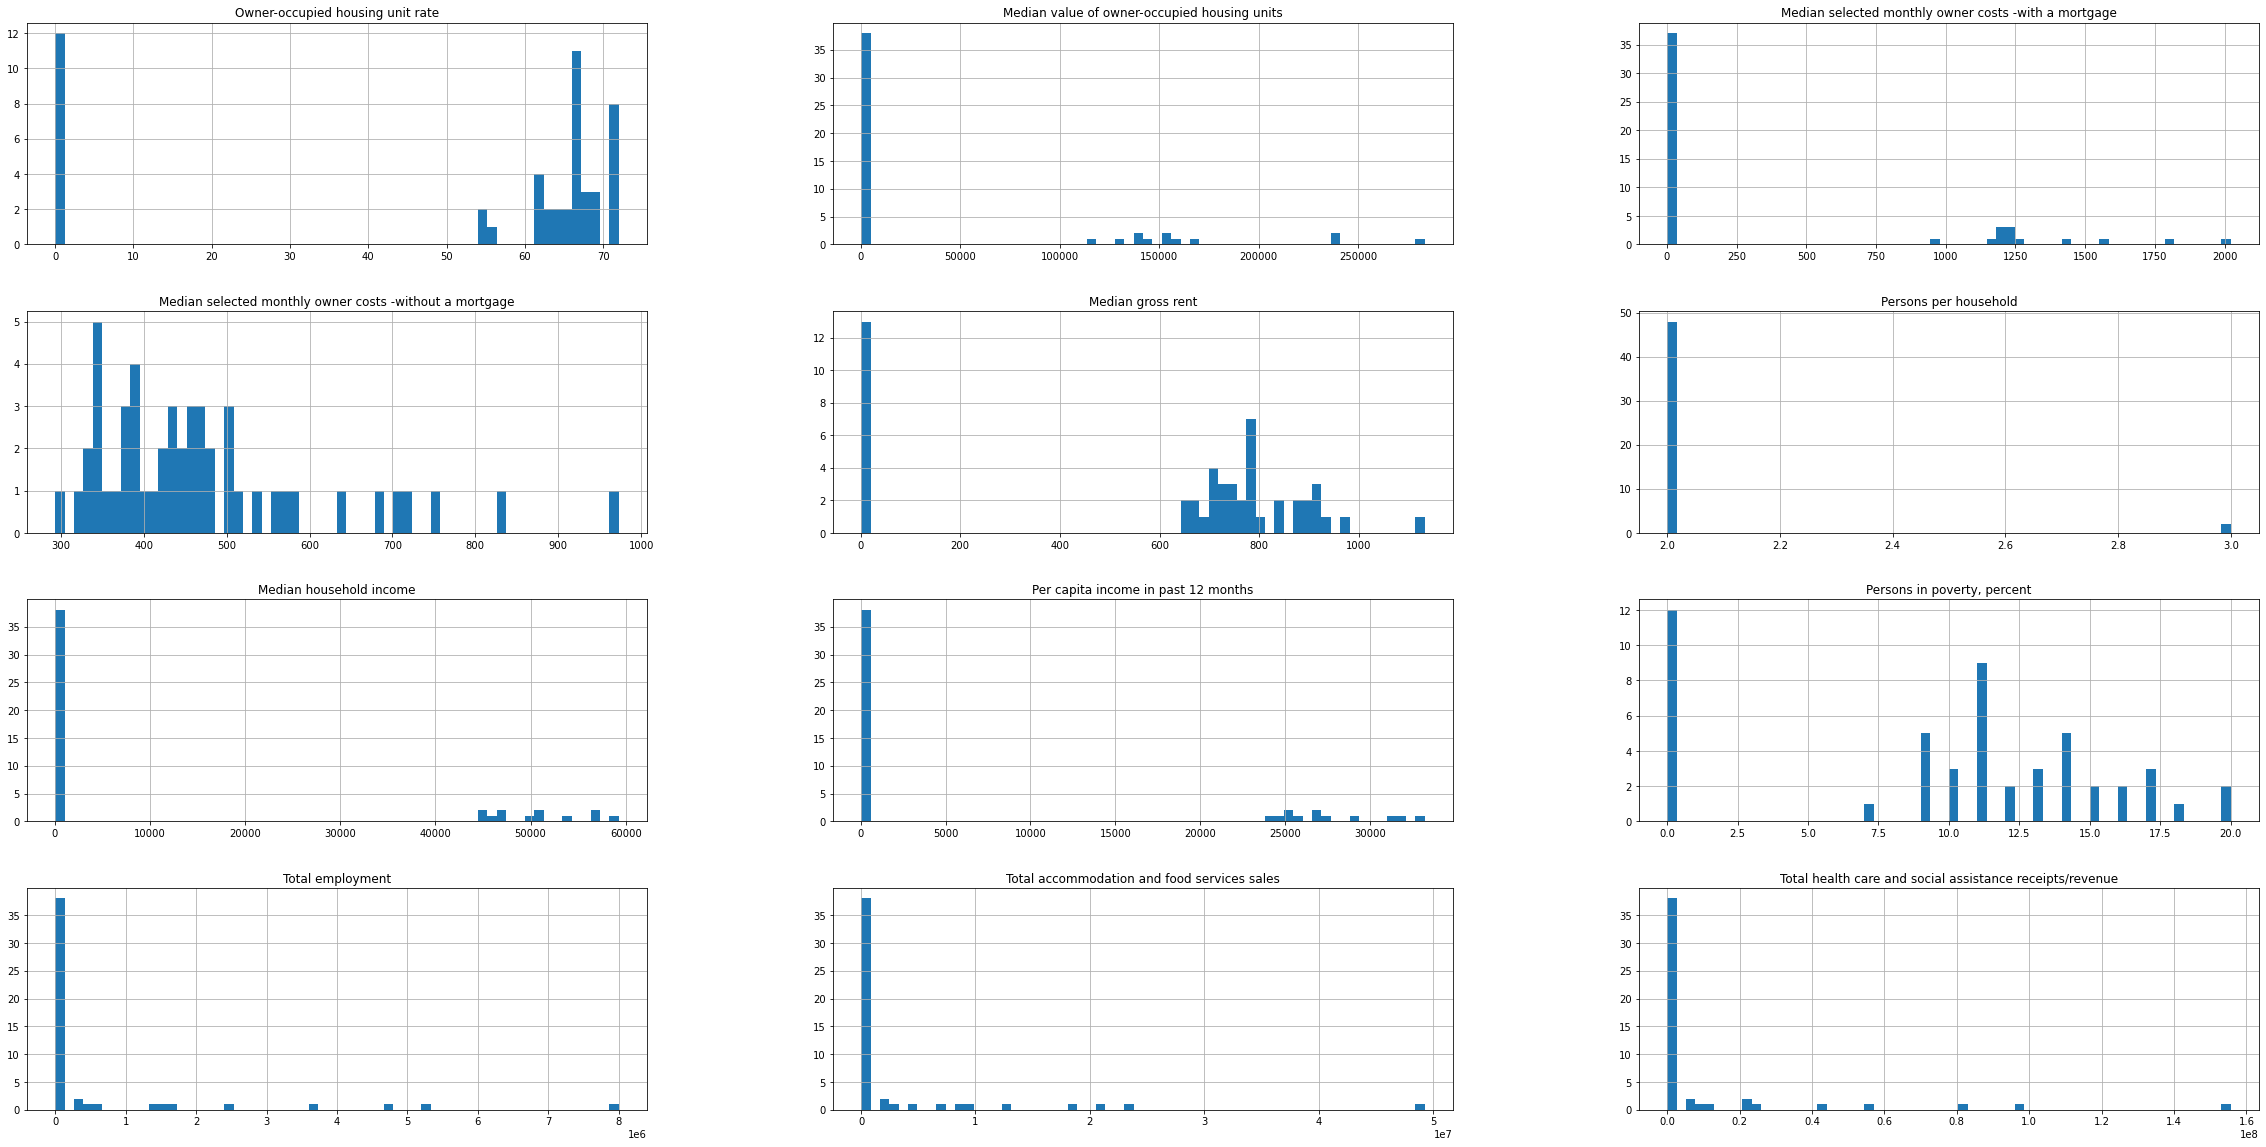

In [43]:
#View the distribution of values for each factor
census_subset_df.hist(bins=60, figsize=(40,20))

For all graphs, we can see the significance of the number of counts of "0"; When analuzing the data further, it would be interesting to exclude those holding a value of 0 when comparing to gun data. 

In [44]:
#The facts chosen for analysis in the census data were all collected in 2015 or 2012. As such the gun data must also be filtered and narrowed to only report data from 2015. 
gun_data_df = gun_df[gun_df["month"].str.contains('2015','2012')]
gun_data_df

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
1155,2015-12,Alabama,31359.0,NaN,47605.0,33710.0,1698.0,1752,0.0,18.0,15.0,0.0,2579.0,2136.0,10.0,0.0,0.0,0.0,NaN,NaN,12.0,14.0,4.0,2.0,0.0,0.0,120914
1156,2015-12,Alaska,245.0,NaN,5265.0,4638.0,356.0,214,0.0,5.0,7.0,0.0,150.0,140.0,3.0,18.0,10.0,0.0,NaN,NaN,1.0,3.0,0.0,0.0,0.0,0.0,11055
1157,2015-12,Arizona,2940.0,NaN,25562.0,14725.0,1327.0,995,0.0,6.0,3.0,1.0,1384.0,725.0,3.0,73.0,3.0,1.0,NaN,NaN,6.0,2.0,2.0,1.0,0.0,0.0,47759
1158,2015-12,Arkansas,4076.0,NaN,13780.0,15241.0,365.0,521,0.0,8.0,13.0,0.0,1109.0,1755.0,1.0,0.0,0.0,0.0,NaN,NaN,9.0,7.0,1.0,0.0,0.0,0.0,36886
1159,2015-12,California,119166.0,NaN,74399.0,48762.0,9583.0,0,0.0,0.0,0.0,0.0,580.0,451.0,5.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,252946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,2015-01,Virginia,379.0,NaN,21023.0,14433.0,844.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,36685
1811,2015-01,Washington,10516.0,NaN,13781.0,9419.0,1423.0,473,5.0,2.0,2.0,0.0,1246.0,1149.0,2.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,38018
1812,2015-01,West Virginia,1450.0,NaN,6881.0,5876.0,289.0,406,15.0,1.0,2.0,0.0,1032.0,1669.0,3.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,17624
1813,2015-01,Wisconsin,4614.0,NaN,9703.0,9221.0,608.0,49,0.0,0.0,1.0,0.0,123.0,263.0,5.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,24587


In [45]:
#Check for duplicates
gun_data_df.duplicated().values.any()

False

In [46]:
#Check for nulls
gun_data_df.isnull().values.any()

True

In [47]:
#Check where nulls can be found
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

array([[<AxesSubplot:title={'center':'permit'}>,
        <AxesSubplot:title={'center':'permit_recheck'}>,
        <AxesSubplot:title={'center':'handgun'}>,
        <AxesSubplot:title={'center':'long_gun'}>,
        <AxesSubplot:title={'center':'other'}>],
       [<AxesSubplot:title={'center':'multiple'}>,
        <AxesSubplot:title={'center':'admin'}>,
        <AxesSubplot:title={'center':'prepawn_handgun'}>,
        <AxesSubplot:title={'center':'prepawn_long_gun'}>,
        <AxesSubplot:title={'center':'prepawn_other'}>],
       [<AxesSubplot:title={'center':'redemption_handgun'}>,
        <AxesSubplot:title={'center':'redemption_long_gun'}>,
        <AxesSubplot:title={'center':'redemption_other'}>,
        <AxesSubplot:title={'center':'returned_handgun'}>,
        <AxesSubplot:title={'center':'returned_long_gun'}>],
       [<AxesSubplot:title={'center':'returned_other'}>,
        <AxesSubplot:title={'center':'rentals_handgun'}>,
        <AxesSubplot:title={'center':'rentals_long_gun

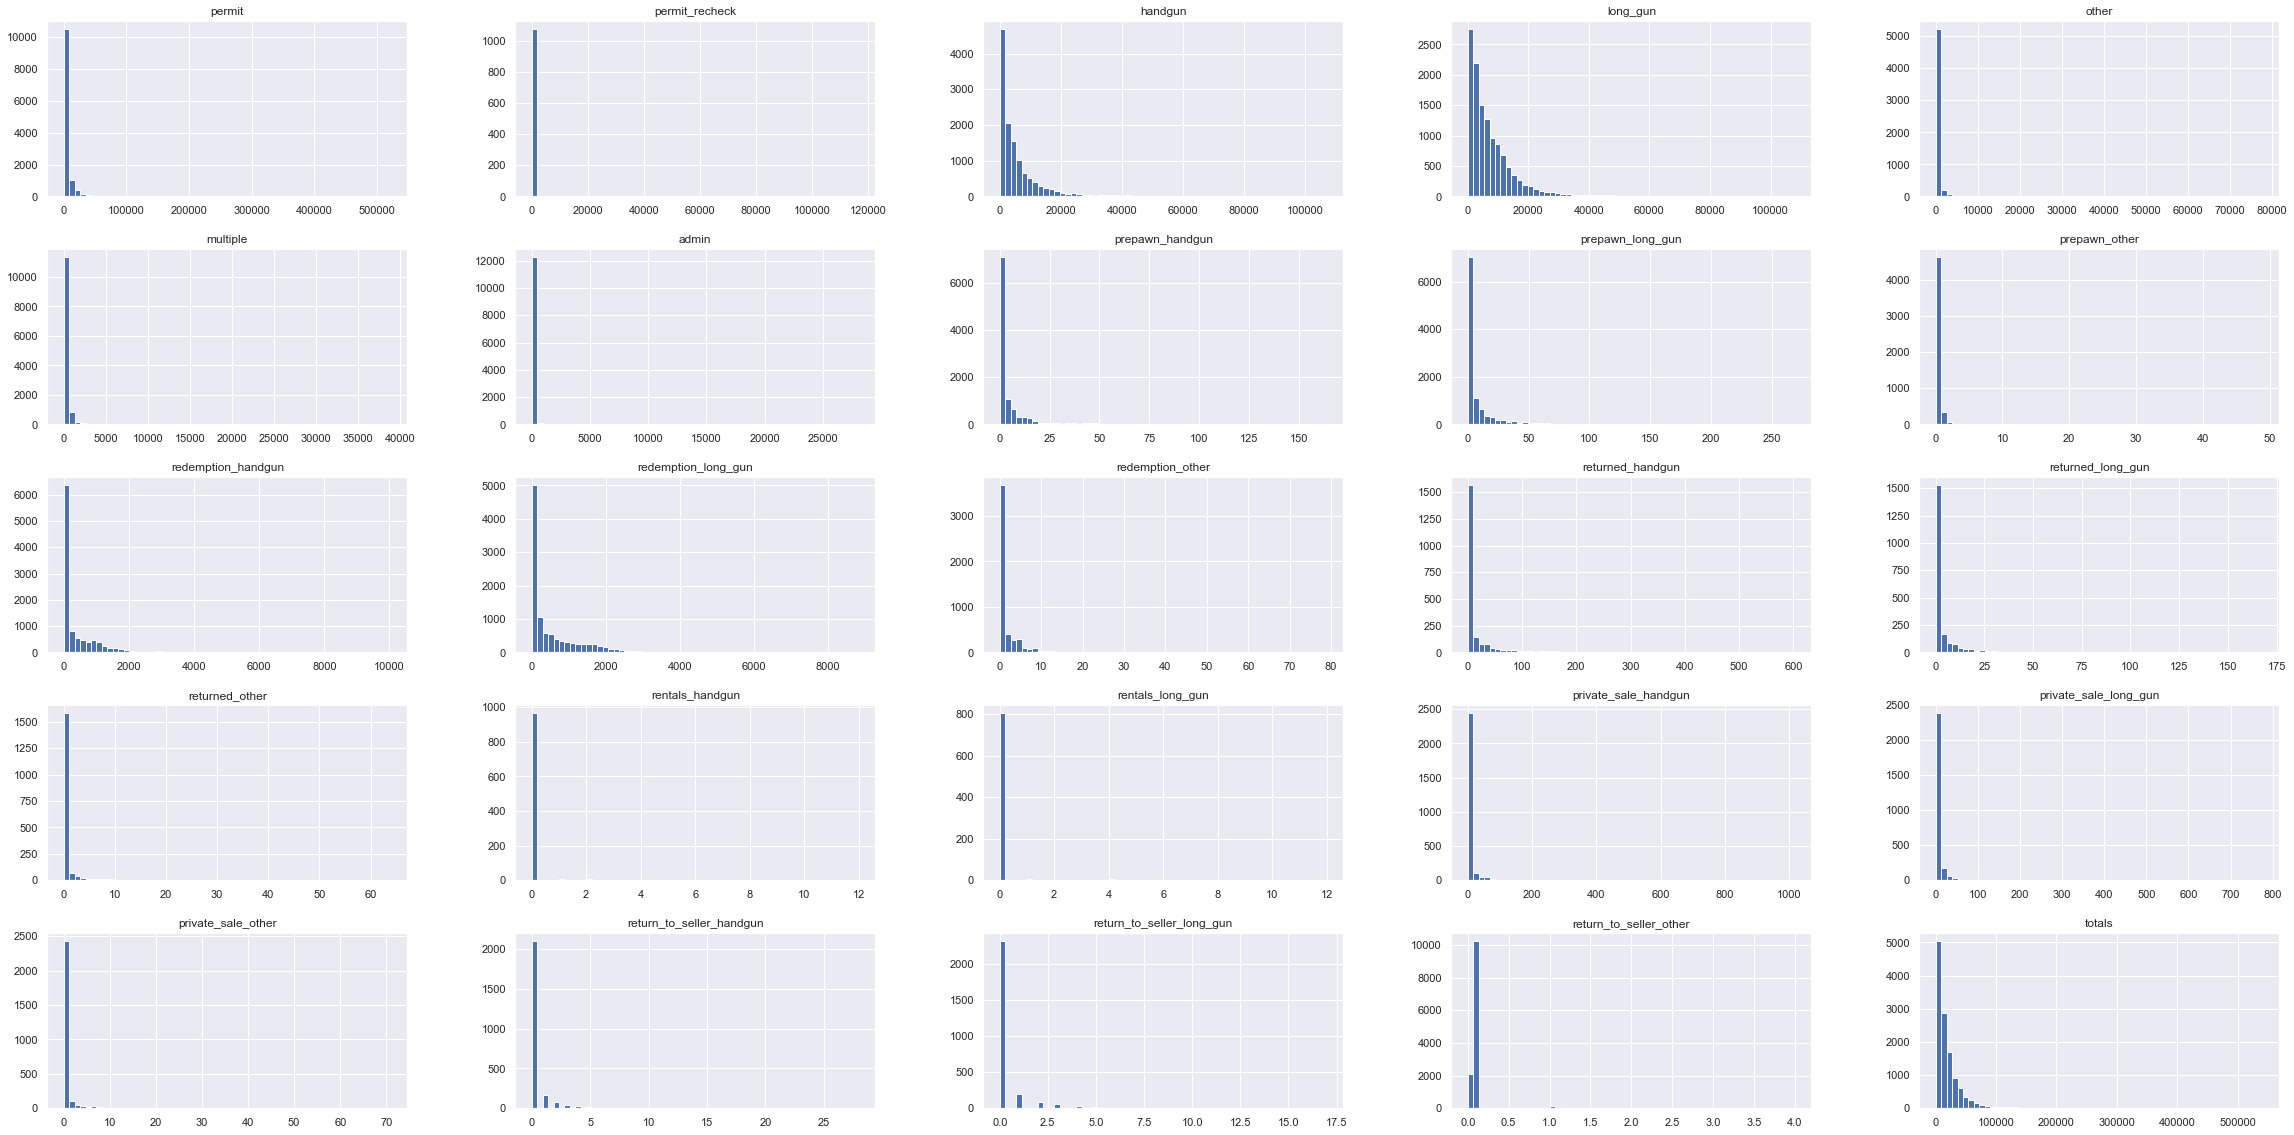

In [76]:
#View spread of data for each factor
gun_df.hist(bins=60, figsize=(40,20))

Before cleaning the data, let's narrow the dataset to include only factors of interest. For this analysis, unspecified categories such as "admin" will be remouved. Elsewhere, though it would be interesting to see the relationship between the census data and permit rechecks, there are multiple null values with very little distribution. Finally, to provide a focus to the analysis and to account for the number of nulls found in individual factors, the prepawn, rented and redemption guns will be excluded from analysis. 

In [51]:
#Eliminate all columns that are irrelevant to the analyssis given the findings in the decription of the dataframe
gun_data_subset_df = gun_data_df [['totals','state','permit','handgun','long_gun','other','private_sale_handgun','private_sale_long_gun','private_sale_other','return_to_seller_long_gun','return_to_seller_handgun','return_to_seller_other','returned_long_gun','returned_handgun','returned_other']]
gun_data_subset_df.describe()

#change 'totals' column name to 'Total gun sales'
new_labels = list(gun_data_subset_df.columns)
new_labels[0] ='Total gun sale'
gun_data_subset_df.columns = new_labels

#Check Changes
gun_data_subset_df.head()

,Total gun sale,state,permit,handgun,long_gun,other,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_long_gun,return_to_seller_handgun,return_to_seller_other,returned_long_gun,returned_handgun,returned_other
1155,120914,Alabama,31359.0,47605.0,33710.0,1698.0,12.0,14.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0
1156,11055,Alaska,245.0,5265.0,4638.0,356.0,1.0,3.0,0.0,0.0,0.0,0.0,10.0,18.0,0.0
1157,47759,Arizona,2940.0,25562.0,14725.0,1327.0,6.0,2.0,2.0,0.0,1.0,0.0,3.0,73.0,1.0
1158,36886,Arkansas,4076.0,13780.0,15241.0,365.0,9.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1159,252946,California,119166.0,74399.0,48762.0,9583.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After narrowing and cleaning the dataset we can see that the spread of gun possession has a wider distribution, as indicated by a larger standard deviation, than the rates of returns. Te same can be said about the private sales, which also hover closer to the mean. The lower standard deviations for gun returns and provate sales, both possessing means closer to 0 indicate that gun possession most likely remains stable or increases over time as less individuals have returned their firearm.  

In [79]:
#View non-null value count per category
gun_data_subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1155 to 1814
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Total gun sale             660 non-null    int64  
 1   state                      660 non-null    object 
 2   permit                     660 non-null    float64
 3   handgun                    660 non-null    float64
 4   long_gun                   660 non-null    float64
 5   other                      660 non-null    float64
 6   private_sale_handgun       660 non-null    float64
 7   private_sale_long_gun      660 non-null    float64
 8   private_sale_other         660 non-null    float64
 9   return_to_seller_long_gun  660 non-null    float64
 10  return_to_seller_handgun   660 non-null    float64
 11  return_to_seller_other     660 non-null    float64
 12  returned_long_gun          660 non-null    float64
 13  returned_handgun           660 non-null    flo

In [80]:
mean = gun_data_subset_df['return_to_seller_other'].mean()
gun_data_subset_df['return_to_seller_other'].fillna(mean, inplace = True)
gun_data_subset_df.isnull().values.any()

False

Now that both datasets have been filters for factors of interest and cleaned, we can combine both sets. 

In [64]:
#Combine dataset with a left join, favouring the gun data
df_combined = gun_data_subset_df.merge(census_subset_df, how='left', on='state')
df_combined.head(10)

,Total gun sale,state,permit,handgun,long_gun,other,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_long_gun,return_to_seller_handgun,return_to_seller_other,returned_long_gun,returned_handgun,returned_other,Owner-occupied housing unit rate,Median value of owner-occupied housing units,Median selected monthly owner costs -with a mortgage,Median selected monthly owner costs -without a mortgage,Median gross rent,Persons per household,Median household income,Per capita income in past 12 months,"Persons in poverty, percent",Total employment,Total accommodation and food services sales,Total health care and social assistance receipts/revenue
0,120914,Alabama,31359.0,47605.0,33710.0,1698.0,12.0,14.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,68.0,125.0,1.0,345.0,717.0,2.0,43.0,24.0,17.0,1.0,7.0,26.0
1,11055,Alaska,245.0,5265.0,4638.0,356.0,1.0,3.0,0.0,0.0,0.0,0.0,10.0,18.0,0.0,63.0,250.0,1.0,554.0,1.0,2.0,72.0,33.0,9.0,267.0,2.0,6.0
2,47759,Arizona,2940.0,25562.0,14725.0,1327.0,6.0,2.0,2.0,0.0,1.0,0.0,3.0,73.0,1.0,62.0,167.0,1.0,380.0,913.0,2.0,50.0,25.0,16.0,2.0,13.0,37.0
3,36886,Arkansas,4076.0,13780.0,15241.0,365.0,9.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,111.0,1.0,327.0,677.0,2.0,41.0,22.0,17.0,1.0,4.0,15.0
4,252946,California,119166.0,74399.0,48762.0,9583.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,385.0,2.0,500.0,1.0,2.0,61.0,30.0,14.0,14.0,90.0,248.0
5,64547,Colorado,3265.0,34653.0,22880.0,1903.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,160.0,2.0,64.0,247.0,1.0,419.0,1.0,2.0,60.0,32.0,11.0,2.0,13.0,29.0
6,36673,Connecticut,12190.0,17828.0,6337.0,314.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,270.0,2.0,833.0,1.0,2.0,70.0,38.0,9.0,1.0,9.0,29.0
7,7670,Delaware,297.0,3615.0,3274.0,175.0,100.0,32.0,5.0,2.0,3.0,1.0,0.0,0.0,0.0,71.0,231.0,1.0,445.0,1.0,2.0,60.0,30.0,11.0,397.0,2.0,7.0
8,95,District of Columbia,16.0,76.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,168935,Florida,25044.0,86940.0,45769.0,4165.0,64.0,37.0,2.0,0.0,1.0,0.0,16.0,45.0,0.0,65.0,159.0,1.0,463.0,1.0,2.0,47.0,26.0,14.0,7.0,49.0,124.0


<a id='eda'></a>
## Exploratory Data Analysis

When first taking a look at the dataset the following questions come to mind: 

- Does financial prosperty influence gun purchases? 
- What is the affects of employment rate on gun purchases? 
- What is the impact of population density on gun purchases? 

Let's first take a look at the found correlations between datapoints. 

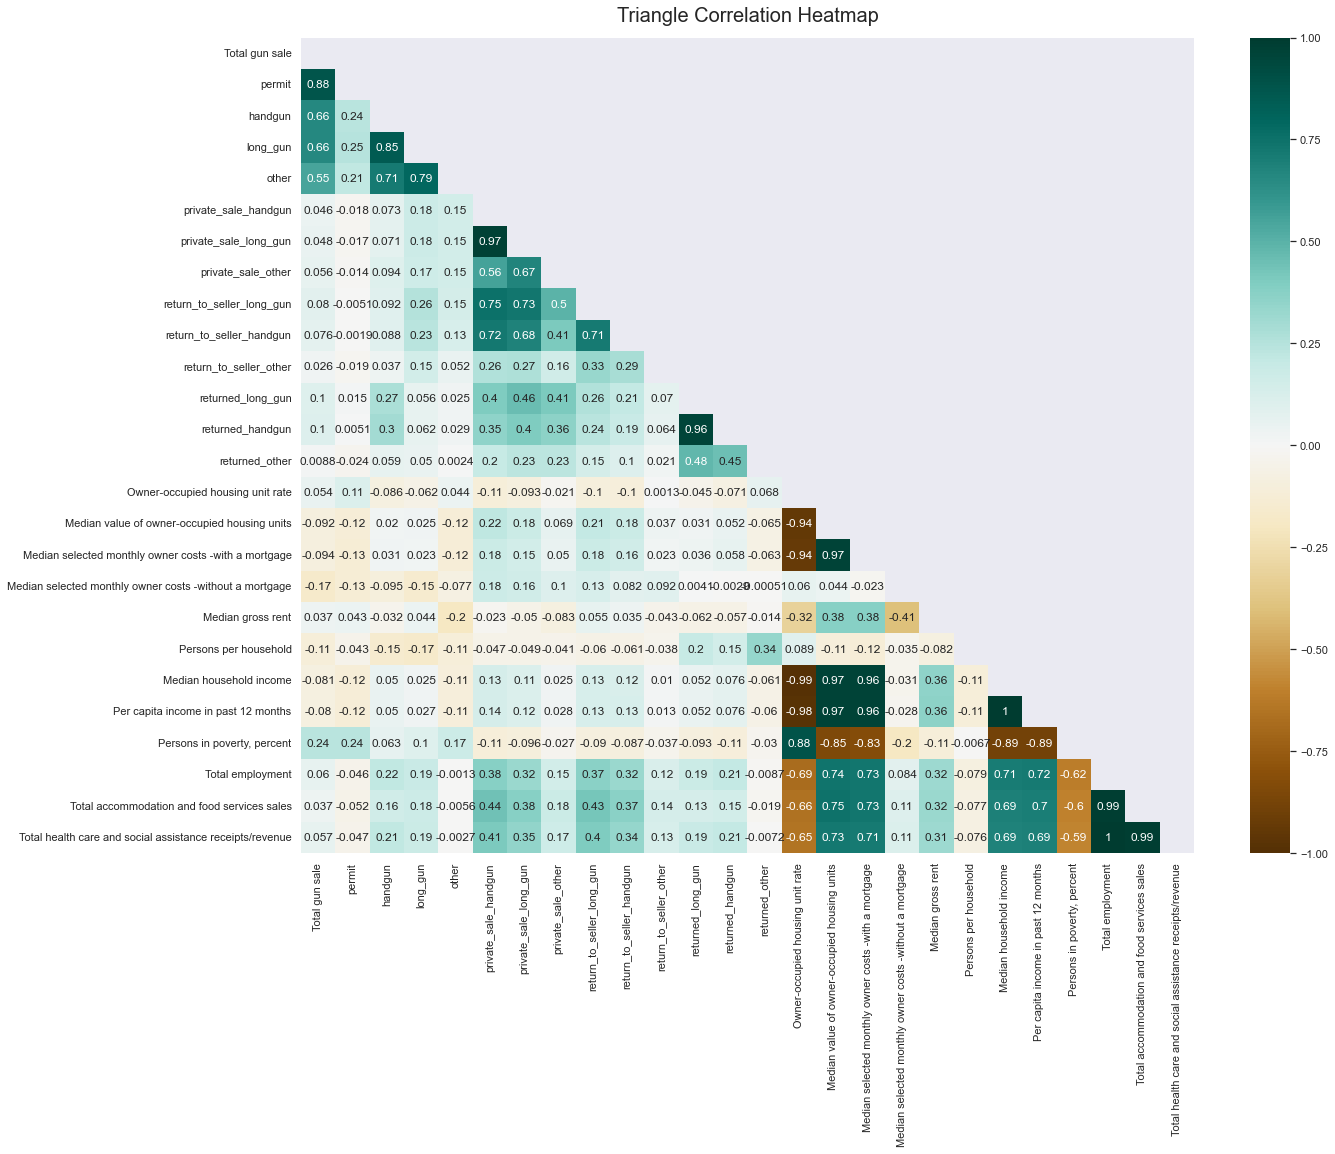

In [65]:
plt.figure(figsize=(20, 15))
sns.set(font_scale=1)
# define the mask to set the values in the upper triangle to True
heatmap = sns.heatmap(df_combined.corr(),mask = np.triu(np.ones_like(df_combined.corr(), dtype=np.bool_)),vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':20}, pad=16);

The census data and gun data are weekly correlated. There are, however, some interesting correlations between factors of each respective orginial datasets.

### Does financial prosperity impact gun purchases? 

Based on the heatmap above and the table below, there is a weak correlation between gun purchases and the census data that suggests financial prosperity in the US as a whole; let's take a closer look at the relationships between total gun purchases and income per capita and Median household income 

In [66]:
df=df_combined[['Total gun sale','handgun','long_gun','other', 'Per capita income in past 12 months','Median household income']]
df.corr()

,Total gun sale,handgun,long_gun,other,Per capita income in past 12 months,Median household income
Total gun sale,1.000000,0.657651,0.657760,0.547932,-0.080157,-0.081375
handgun,0.657651,1.000000,0.849484,0.711985,0.050491,0.049950
long_gun,0.657760,0.849484,1.000000,0.789625,0.027173,0.024784
other,0.547932,0.711985,0.789625,1.000000,-0.106057,-0.105848
Per capita income in past 12 months,-0.080157,0.050491,0.027173,-0.106057,1.000000,0.999736
Median household income,-0.081375,0.049950,0.024784,-0.105848,0.999736,1.000000


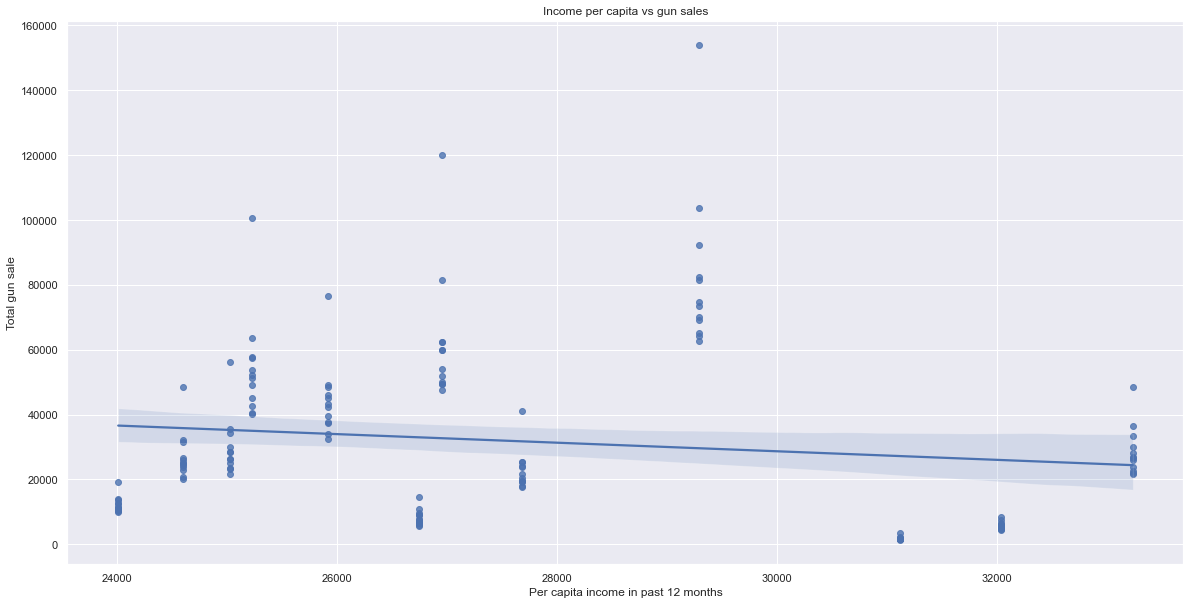

In [511]:
#Income per capita vs gun sales plot
ax = sns.regplot(x="Per capita income in past 12 months", y="Total gun sale", data=df_combined[(df_combined['Per capita income in past 12 months']> 50)][:600])
ax.set_title("Income per capita vs gun sales")
sns.set(font_scale=1)
plt.rcParams['figure.figsize']=(20,10)

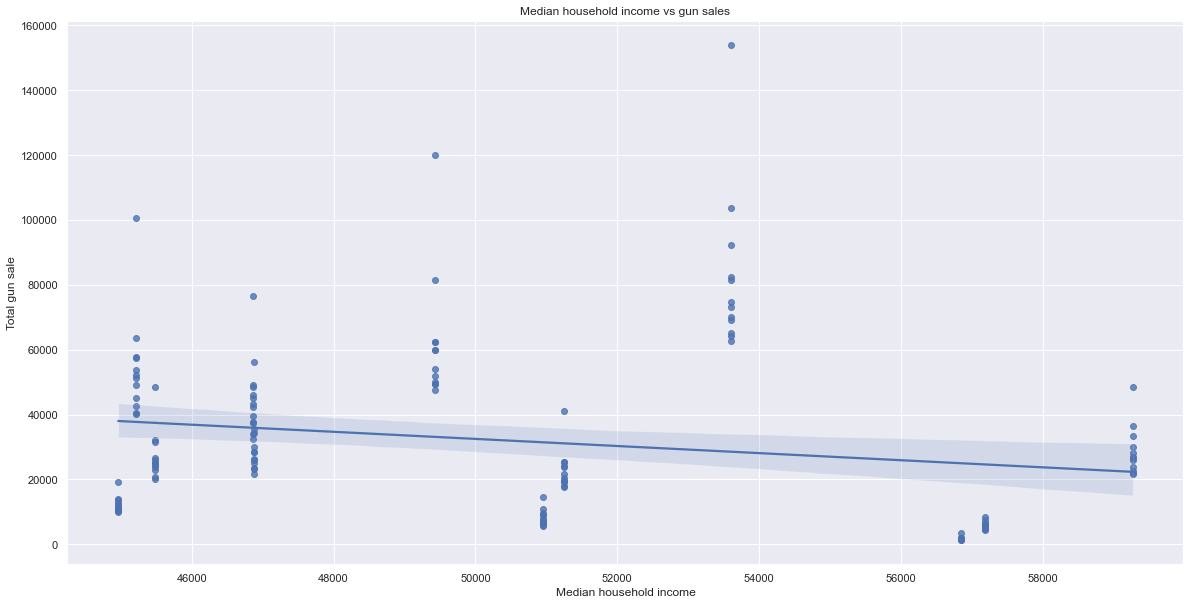

In [512]:
#Median household income vs gun sales plot
ax = sns.regplot(x="Median household income", y="Total gun sale", data=df_combined[(df_combined['Per capita income in past 12 months']> 50)][:600])
plt.rcParams['figure.figsize']=(20,10)
ax.set_title("Median household income vs gun sales")
sns.set(font_scale=1)
plt.rcParams['figure.figsize']=(20,10)

As we can see in both graphs, the slope of the line is quite flat; there is no relationship between the dependent variable of gun purchases. In other words, welath expressed in terms of income per capita and median household income has no effect on total gun purchases in the United States.

### Do employment rates influence gun purchases? 

Based on the heatmap above and the table below, there is a weak correlation between gun purchases and total employment in the US.

In [70]:
df=df_combined[['Total gun sale','handgun','long_gun','other', 'Total employment']]
df.corr()

,Total gun sale,handgun,long_gun,other,Total employment
Total gun sale,1.000000,0.657651,0.657760,0.547932,0.059801
handgun,0.657651,1.000000,0.849484,0.711985,0.215130
long_gun,0.657760,0.849484,1.000000,0.789625,0.191134
other,0.547932,0.711985,0.789625,1.000000,-0.001332
Total employment,0.059801,0.215130,0.191134,-0.001332,1.000000


There are, however, moderate realtionships between private gun sales and total employment. Similarly, employment and guns that were returned to seller are moderetly correlated. 

In [71]:
df=df_combined[['Total employment','private_sale_handgun','private_sale_long_gun','private_sale_other','return_to_seller_long_gun','return_to_seller_handgun','return_to_seller_other']]
df.corr()

,Total employment,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_long_gun,return_to_seller_handgun,return_to_seller_other
Total employment,1.000000,0.379975,0.323924,0.151516,0.370460,0.321115,0.119788
private_sale_handgun,0.379975,1.000000,0.973503,0.561094,0.752621,0.718792,0.259098
private_sale_long_gun,0.323924,0.973503,1.000000,0.672302,0.726649,0.684095,0.269407
private_sale_other,0.151516,0.561094,0.672302,1.000000,0.497113,0.407822,0.162709
return_to_seller_long_gun,0.370460,0.752621,0.726649,0.497113,1.000000,0.712066,0.329562
return_to_seller_handgun,0.321115,0.718792,0.684095,0.407822,0.712066,1.000000,0.285130
return_to_seller_other,0.119788,0.259098,0.269407,0.162709,0.329562,0.285130,1.000000


With a correlation of 0.379975 let's see the distribution of values between private handgun sales and total employement 

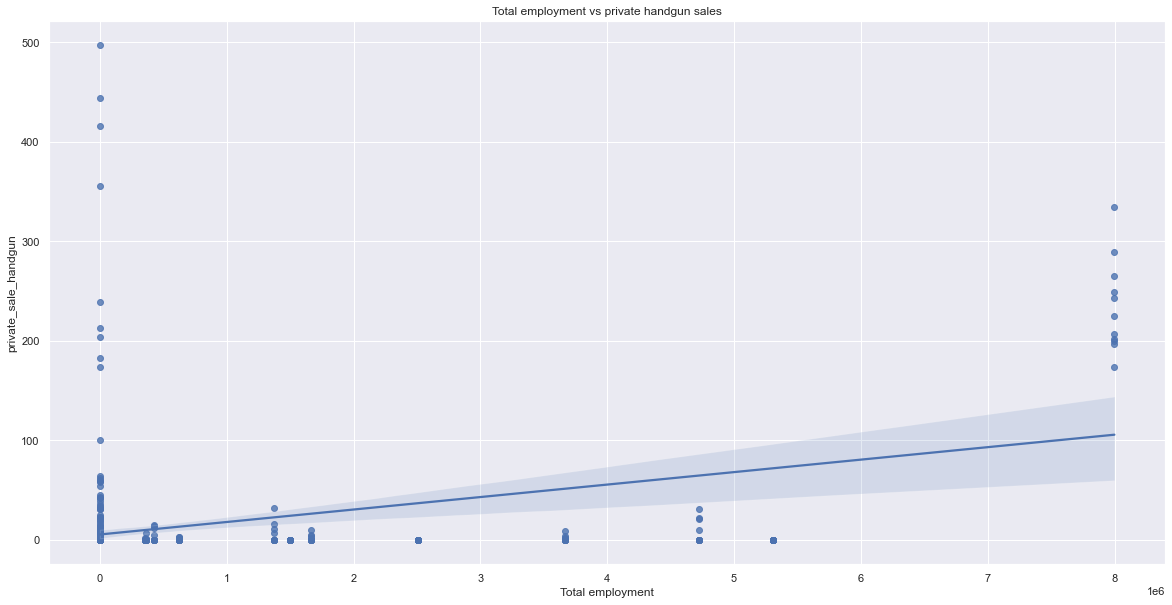

In [74]:
#Total employment vs private handgun sales
ax = sns.regplot(x="Total employment", y="private_sale_handgun", data=df_combined[:600])
plt.rcParams['figure.figsize']=(20,10)
ax.set_title("Total employment vs private handgun sales")
sns.set(font_scale=1)
plt.rcParams['figure.figsize']=(20,10)

Similarly, with a corelation of 0.370460 let's take a look at the distribution of values between returned handguns to seller and total employement 

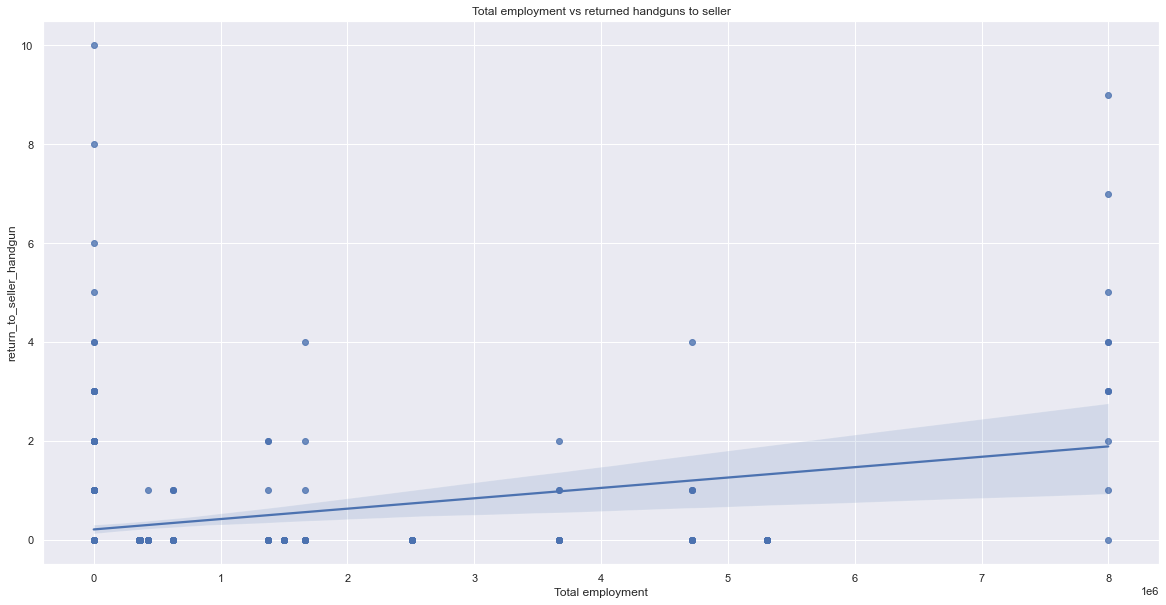

In [81]:
#Total employment vs private longgun sales
ax = sns.regplot(x="Total employment", y="return_to_seller_handgun", data=df_combined[:600])
plt.rcParams['figure.figsize']=(20,10)
ax.set_title("Total employment vs returned handguns to seller")
sns.set(font_scale=1)
plt.rcParams['figure.figsize']=(20,10)

Though the slops of both graphs are almost identicial, the distribution of values varies. Let's take a look at the relationship between purchased handguns and handguns that were returned to the seller as these two variables hold a correlation of 0.718792

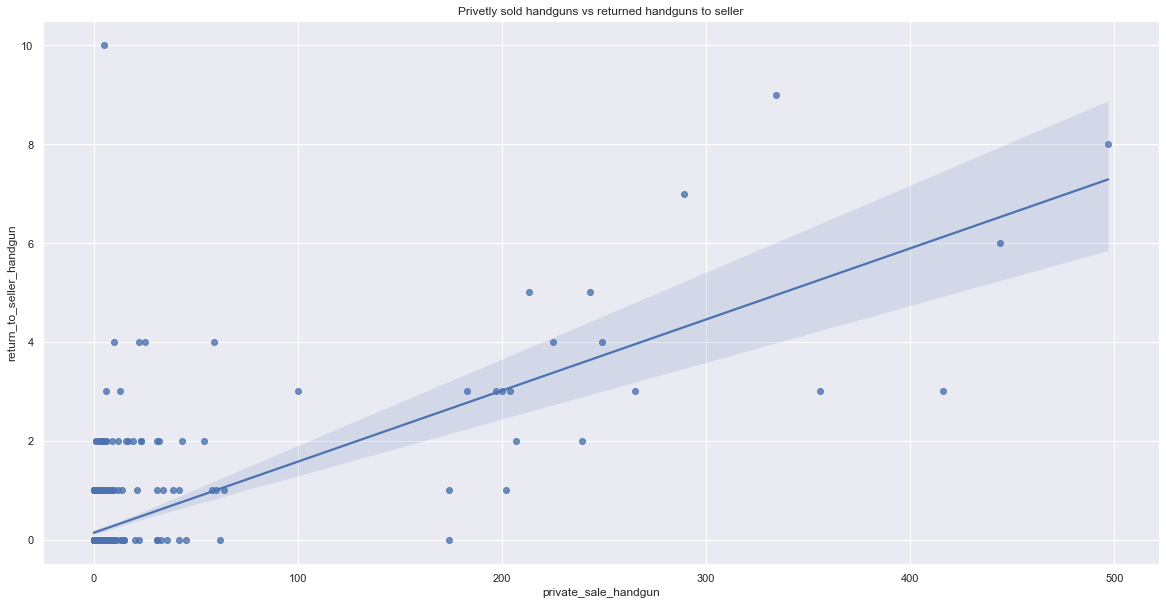

In [82]:
#Total employment vs private longgun sales
ax = sns.regplot(x="private_sale_handgun", y="return_to_seller_handgun", data=df_combined[:600])
plt.rcParams['figure.figsize']=(20,10)
ax.set_title("Privetly sold handguns vs returned handguns to seller")
sns.set(font_scale=1)
plt.rcParams['figure.figsize']=(20,10)

This potential correlation may indiciate high volumes of sales from private venders due to momentary shortage in supplies. According to the graphs provided in [this article](https://www.pbs.org/newshour/nation/analysis-how-firearm-manufacturers-influence-american-gun-culture-in-6-charts), the final year of our dataset, 2015, saw a plateau in gun sales following and followed by a surge in manufacturing.

### What is the relationship between gun purchases? 

<a id='conclusions'></a>
## Conclusions